# Assignment #2 - Classification

<font color="red"> <b> Due: April 10  EOD</b> </font>

<font color="blue"> Aditya Athota </font>
<p style="color:green">UB ID: 50368003 </p>

# I. Introduction

Describe the objective of this assignment. You can briefly state how you accompilsh it.

# II. Data

You may choose one of the following three datasets to work on. Introduce your data and visualize them. Describe your observations about the data. 
1. https://archive.ics.uci.edu/ml/datasets/covertype
2. https://archive.ics.uci.edu/ml/datasets/bank+marketing
3. https://archive.ics.uci.edu/ml/datasets/Activity+recognition+using+wearable+physiological+measurements (data download link - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6960825/bin/sensors-19-05524-s001.zip)


# III. Method

Summarize the Least Mean Square Classifier, Fisher Linear Discriminant, Perceptron,logistic regression, and Neural Network.
Do not forget explain your implementation. 

The explanation of your codes should not be the comments in a code cell. 
Each implementation will be followed by a separate cell that should include
 - review of the 4 classification models 
 - your implementation and description


### Method

### NOTE: Sklearn library have been used here as the guidelines in the UB learns stated that this library can be used.

In [1]:
!pip3 install numpy sklearn pandas matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
import seaborn as sns
import random
from sklearn.preprocessing import LabelEncoder

from prml.preprocess import PolynomialFeature
from prml.linear import (
    BayesianLogisticRegression,
    LeastSquaresClassifier,
    FishersLinearDiscriminant,
    LogisticRegression,
    Perceptron,
    SoftmaxRegression
)

import time

%matplotlib inline

In [3]:
import numpy as np

##your method implementation goes here
#Read the file
df = pd.read_csv("./bank-additional/bank-additional-full.csv", sep= ';')

print("\n \t The data frame has {0[0]} rows and {0[1]} columns. \n".format(df.shape))

df


 	 The data frame has 41188 rows and 21 columns. 



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
#Fetching the number of no and yes values that are present in the given dataset
list_all = list(df.shape)[0]
list_categories = list(df['y'].value_counts())

print("\n \t The data has {} records, {} 'no' and {} 'yes'.".format(list_all, list_categories[0], list_categories[1]))


 	 The data has 41188 records, 36548 'no' and 4640 'yes'.


### From above data we can conclude that the dataset is largely imbalanced. Therefore, we have a higher chances of getting the negative label than a positive one.

In [5]:
str_to_int = {'no':0, 'yes':1}
df['y'] = df['y'].map(str_to_int) #Every entry should be numerical so changing yes with 1 and no with 0.

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [6]:
labelencoder = LabelEncoder()

df['job'] = labelencoder.fit_transform(df['job'])
df['marital'] = labelencoder.fit_transform(df['marital'])
df['education'] = labelencoder.fit_transform(df['education'])
df['default'] = labelencoder.fit_transform(df['default'])
df['housing'] = labelencoder.fit_transform(df['housing'])
df['loan'] = labelencoder.fit_transform(df['loan'])
df['contact'] = labelencoder.fit_transform(df['contact'])
df['month'] = labelencoder.fit_transform(df['month'])
df['day_of_week'] = labelencoder.fit_transform(df['day_of_week'])
df['poutcome'] = labelencoder.fit_transform(df['poutcome'])

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [7]:
df = pd.concat([df,pd.get_dummies(df['job'], prefix='job')],axis=1)
df = pd.concat([df,pd.get_dummies(df['marital'], prefix='marital')],axis=1)
df = pd.concat([df,pd.get_dummies(df['education'], prefix='education')],axis=1)
df = pd.concat([df,pd.get_dummies(df['default'], prefix='default')],axis=1)
df = pd.concat([df,pd.get_dummies(df['housing'], prefix='housing')],axis=1)
df = pd.concat([df,pd.get_dummies(df['loan'], prefix='loan')],axis=1)
df = pd.concat([df,pd.get_dummies(df['contact'], prefix='contact')],axis=1)
df = pd.concat([df,pd.get_dummies(df['month'], prefix='month')],axis=1)
df = pd.concat([df,pd.get_dummies(df['day_of_week'], prefix='day_of_week')],axis=1)
df = pd.concat([df,pd.get_dummies(df['poutcome'], prefix='poutcome')],axis=1)

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_8,month_9,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,poutcome_0,poutcome_1,poutcome_2
0,56,3,1,0,0,0,0,1,6,1,...,0,0,0,1,0,0,0,0,1,0
1,57,7,1,3,1,0,0,1,6,1,...,0,0,0,1,0,0,0,0,1,0
2,37,7,1,3,0,2,0,1,6,1,...,0,0,0,1,0,0,0,0,1,0
3,40,0,1,1,0,0,0,1,6,1,...,0,0,0,1,0,0,0,0,1,0
4,56,7,1,3,0,0,2,1,6,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,0,0,1,0,0,0,0,0,1,0
41184,46,1,1,5,0,0,0,0,7,0,...,0,0,1,0,0,0,0,0,1,0
41185,56,5,1,6,0,2,0,0,7,0,...,0,0,1,0,0,0,0,0,1,0
41186,44,9,1,5,0,0,0,0,7,0,...,0,0,1,0,0,0,0,0,1,0


In [8]:
df.drop(['job'],axis=1, inplace=True)
df.drop(['marital'],axis=1, inplace=True)
df.drop(['education'],axis=1, inplace=True)
df.drop(['default'],axis=1, inplace=True)
df.drop(['housing'],axis=1, inplace=True)
df.drop(['loan'],axis=1, inplace=True)
df.drop(['contact'],axis=1, inplace=True)
df.drop(['month'],axis=1, inplace=True)
df.drop(['day_of_week'],axis=1, inplace=True)
df.drop(['poutcome'],axis=1, inplace=True)

df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_8,month_9,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,poutcome_0,poutcome_1,poutcome_2
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0


In [9]:
y_data = df["y"]
y_data = y_data.astype('float32')
df = df.drop(columns = "y",axis = 1)
df = df.astype('float32')

In [10]:
y_data = pd.DataFrame(y_data)
y_data.head()

,y
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [11]:
y_data = y_data.to_numpy()

In [12]:
y_data.shape

(41188, 1)

In [13]:
df = pd.DataFrame(df)
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_8,month_9,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,poutcome_0,poutcome_1,poutcome_2
0,56.0,261.0,1.0,999.0,0.0,1.1,93.994003,-36.400002,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,57.0,149.0,1.0,999.0,0.0,1.1,93.994003,-36.400002,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,37.0,226.0,1.0,999.0,0.0,1.1,93.994003,-36.400002,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,40.0,151.0,1.0,999.0,0.0,1.1,93.994003,-36.400002,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,56.0,307.0,1.0,999.0,0.0,1.1,93.994003,-36.400002,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
df.shape

(41188, 63)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df, y_data, test_size=0.20, stratify=y_data, random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(32950, 63) (8238, 63) (32950, 1) (8238, 1)


### Now, we are going to classify the models. Following steps have been followed for all the models:
1. Assign the models and fit the trianing data.
2. Predict the model values using the test data.
3. Calculate the Confusion Matrix, Recall, Precision, F1 score, Accuracy of the models.
4. Plot a graph of the confusion matrix with help of seaborn library.

### Logistic Regression

In [16]:
lm = linear_model.LogisticRegression(random_state = 0, penalty = 'l2')
model = lm.fit(X_train, y_train)
logistic_predictions = lm.predict(X_test)

c:\users\aditya athota\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\aditya athota\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
cm_logistic = confusion_matrix(y_test, logistic_predictions)
print(cm_logistic)

[[7123  187]
 [ 582  346]]


In [18]:
f1_score_logistic = f1_score(y_test, logistic_predictions)
print(f1_score_logistic)

0.4736481861738535


In [19]:
recall = recall_score(y_test, logistic_predictions, average='binary')
print('Recall: %.3f' % recall)

Recall: 0.373


In [20]:
print("Precision Score: {0:.2%}".format(precision_score(logistic_predictions, y_test)))

Precision Score: 37.28%


In [21]:
print("Classifier Accuracy: {0:.2%}".format(accuracy_score(logistic_predictions, y_test)))

Classifier Accuracy: 90.67%


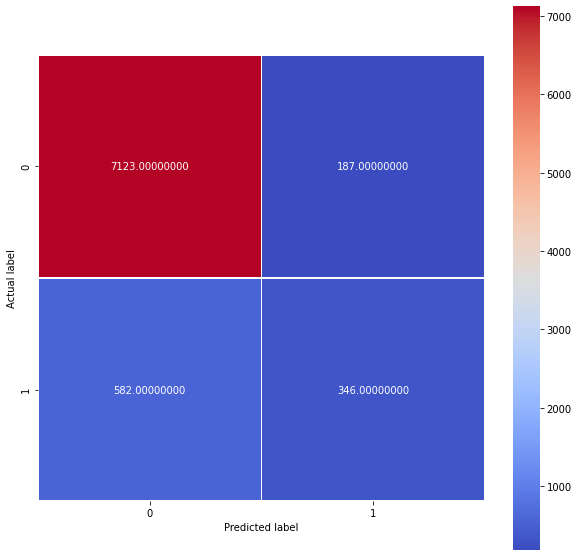

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(cm_logistic, annot=True, fmt=".8f", linewidths=.5, square = True, cmap = 'coolwarm');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.show()

### Perceptron

In [23]:
from sklearn.linear_model import Perceptron

model_perceptron = Perceptron(eta0=0.1, random_state=0)
model_perceptron.fit(X_train, y_train)
perceptron_predictions = model_perceptron.predict(X_test)

c:\users\aditya athota\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [24]:
cm_perceptron = confusion_matrix(y_test, perceptron_predictions)
print(cm_perceptron)

[[7293   17]
 [ 891   37]]


In [25]:
f1_score_perceptron = f1_score(y_test, perceptron_predictions)
print(f1_score_perceptron)

0.07535641547861509


In [26]:
recall = recall_score(y_test, perceptron_predictions, average='binary')
print('Recall: %.3f' % recall)

Recall: 0.040


In [27]:
print("Precision Score: {0:.2%}".format(precision_score(perceptron_predictions, y_test)))

Precision Score: 3.99%


In [28]:
print("Classifier Accuracy: {0:.2%}".format(accuracy_score(perceptron_predictions, y_test)))

Classifier Accuracy: 88.98%


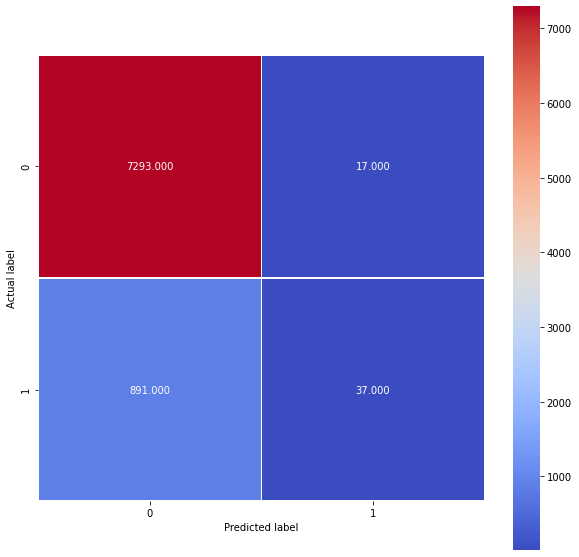

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(cm_perceptron, annot=True, fmt=".3f", linewidths=.8, square = True, cmap = 'coolwarm');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.show()

### Least Square Classifier

In [30]:
model_least = LeastSquaresClassifier()
model_least.fit(X_train, y_train)
least_square_prediction = model_least.classify(X_test)

In [31]:
cm_least_square = confusion_matrix(y_test, least_square_prediction)
print(cm_least_square)

[[7310    0]
 [ 928    0]]


In [32]:
f1_score_least_square = f1_score(y_test, least_square_prediction)
print(f1_score_least_square)

0.0


In [33]:
recall = recall_score(y_test, least_square_prediction, average='binary')
print('Recall: %.3f' % recall)

Recall: 0.000


In [34]:
print("Precision Score: {0:.2%}".format(precision_score(least_square_prediction, y_test)))

Precision Score: 0.00%


In [35]:
print("Classifier Accuracy: {0:.2%}".format(accuracy_score(least_square_prediction, y_test)))

Classifier Accuracy: 88.74%


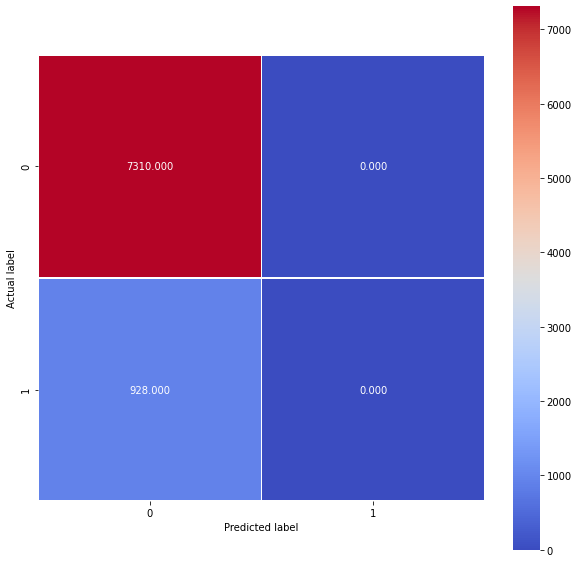

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(cm_least_square, annot=True, fmt=".3f", linewidths=.8, square = True, cmap = 'coolwarm');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.show()

### Neural Network

In [37]:
import sklearn.neural_network

neural_model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', 
                                                 alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, 
                                                 max_iter=1000, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
                                                 nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
                                                 n_iter_no_change=10)

neural_model.fit(X_train, y_train)
neural_predictions = neural_model.predict(X_test)

c:\users\aditya athota\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [38]:
cm_nn = confusion_matrix(y_test, neural_predictions)
print(cm_nn)

[[7293   17]
 [ 851   77]]


In [39]:
f1_score_nn = f1_score(y_test, neural_predictions)
print(f1_score_nn)

0.15068493150684933


In [40]:
recall = recall_score(y_test, neural_predictions, average='binary')
print('Recall: %.3f' % recall)

Recall: 0.083


In [41]:
print("Precision Score: {0:.2%}".format(precision_score(neural_predictions, y_test)))

Precision Score: 8.30%


In [42]:
print("Classifier Accuracy: {0:.2%}".format(accuracy_score(neural_predictions, y_test)))

Classifier Accuracy: 89.46%


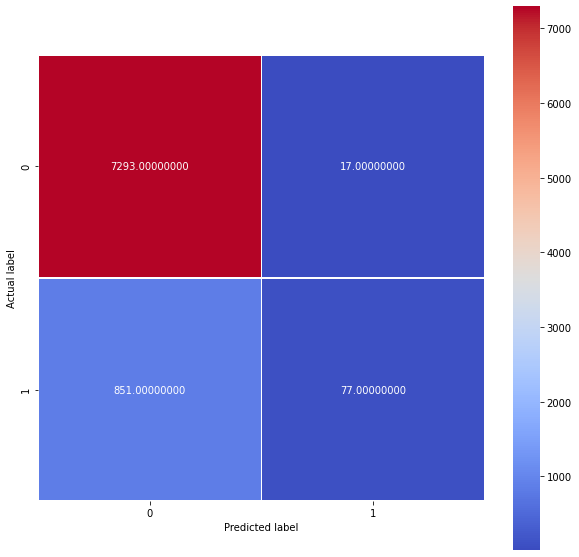

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(cm_nn, annot=True, fmt=".8f", linewidths=.5, square = True, cmap = 'coolwarm');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.show()

# IV. Experiments

Apply the classfiers on the data and discuss the results.
Please describe your codes for experiments. You may have subsections of results and discussions here.
Here follows the list that you consider to include:
- the classification results
- plots of classification results 
- model comparision 
- choice of evaluation metrics
- **Must partition data into training and testing**

# Conclusions

Summarize your work here. 
Which classifier do you think the best? 
Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it.

The dataset that is chosen is the bank marketing dataset. The goal is to predict if the client will subscribe a term deposit (variable y). In summary, I have read the dataset file, converted the term deposit(y) column from string to the integer for the calculations. I used label encoder for few columns which has the string values. Later, I split the data using scikit learn library. At last, I passed this data that is split into different classifiers and calculated the accuracy, precision, recall and f1 score to find out which model is best when compared with others.

The dataset that is taken is highly imbalanced. Due to this, the accuracy is high for every model. When the precision, recall and f1 score is calculated for every model, it is clear that Neural Networks model performs better than the rest of the models.
Out of all the models, Least Square Classifier proves to be useless for this dataset. Our goal is to get how the models perform well in classifying the positive class and this was the main reason behind using the precison,recall and f1 scores as performance metrics and this metrics reveals the real values than the accuracy measured.

# References